In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_predictions.csv to cleaned_predictions.csv
Saving train.csv to train.csv
Saving test.csv to test.csv
Saving sample_submission.csv to sample_submission.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
df = pd.read_csv('/content/train.csv',)
df

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [ ]:
df.rainfall.value_counts()

,count
rainfall,
1,1650
0,540


In [ ]:
sample = pd.read_csv('/content/sample_submission.csv')
sample

,id,rainfall
0,2190,0
1,2191,0
2,2192,0
3,2193,0
4,2194,0
...,...,...
725,2915,0
726,2916,0
727,2917,0
728,2918,0


In [ ]:
test = pd.read_csv('/content/test.csv')
test.shape

(730, 12)

In [ ]:
test.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,729.000000,730.000000
mean,2554.500000,183.000000,1013.503014,26.372466,23.963288,22.110274,20.460137,82.669863,76.360274,3.664384,103.923182,22.484247
std,210.877136,105.438271,5.505871,5.672521,5.278098,5.170744,5.391169,7.818714,17.934121,3.639272,81.695458,9.954779
min,2190.000000,1.000000,1000.000000,7.400000,5.900000,4.200000,-0.000000,39.000000,0.000000,0.000000,10.000000,4.500000
25%,2372.250000,92.000000,1008.725000,21.600000,19.825000,17.825000,16.800000,77.250000,69.000000,0.325000,40.000000,14.500000
50%,2554.500000,183.000000,1012.700000,27.800000,25.650000,23.900000,22.300000,82.000000,83.000000,2.200000,70.000000,21.300000
75%,2736.750000,274.000000,1017.600000,31.000000,28.375000,26.400000,25.000000,89.000000,88.000000,6.675000,200.000000,28.400000
max,2919.000000,365.000000,1032.200000,35.800000,31.800000,29.100000,26.700000,98.000000,100.000000,11.800000,300.000000,59.500000


In [ ]:
test.fillna(0, inplace=True)

In [ ]:
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [ ]:
df.rainfall.value_counts()

,count
rainfall,
1,1650
0,540


In [ ]:
df.isna().sum()

,0
id,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0


In [ ]:
df.corr()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,1.000000,0.153065,-0.008235,0.012590,0.014307,0.018708,0.006797,-0.029042,0.002226,-0.003022,-0.004223,0.020167,0.033674
day,0.153065,1.000000,0.005337,0.146294,0.153590,0.161475,0.137929,-0.074048,-0.048175,0.060936,0.024800,-0.000199,-0.000462
pressure,-0.008235,0.005337,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886
maxtemp,0.012590,0.146294,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304
temparature,0.014307,0.153590,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660
mintemp,0.018708,0.161475,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841
dewpoint,0.006797,0.137929,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965
humidity,-0.029042,-0.074048,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213
cloud,0.002226,-0.048175,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191
sunshine,-0.003022,0.060936,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287


<Axes: >

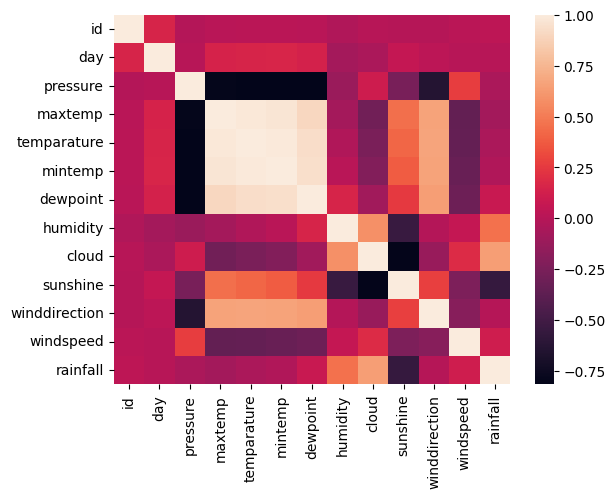

In [ ]:
sns.heatmap(df.corr())

In [ ]:
cols = df.columns.to_list()
cols

['id',
 'day',
 'pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed',
 'rainfall']

In [ ]:
inputs_cols = cols[:-1]
target_cols =['rainfall']

In [ ]:
train_inputs = df[inputs_cols]
train_targets = df[target_cols]
test_inputs = test[inputs_cols]

In [ ]:
scaler = StandardScaler()
scaler.fit(train_inputs)

StandardScaler()

In [ ]:
train_sc_inputs = scaler.transform(train_inputs)
test_sc_inputs = scaler.transform(test_inputs)

In [ ]:
model = LogisticRegression(random_state =42)
model.fit(train_sc_inputs,train_targets)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
pred = model.predict(train_sc_inputs)
pred

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
score = accuracy_score(train_targets,pred)
score

0.867579908675799

In [ ]:
predict =model.predict(test_sc_inputs)
predict.shape

(730,)

In [ ]:
predicted = pd.DataFrame({'id':test.id,'rainfall':predict})
predicted

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [ ]:
predicted.to_csv('predicted.csv')

In [ ]:
predicted.rainfall.value_counts()

,count
rainfall,
1,599
0,131


In [ ]:
predicted

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [ ]:
# Load the predicted file
file_path = "predicted.csv"  # Update with correct file path if needed
df = pd.read_csv(file_path)

# Drop the unwanted "Unnamed: 0" column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Ensure the columns match the expected format
df = df[["id", "rainfall"]]  # Keep only the required columns

# Save the cleaned file
cleaned_file_path = "cleaned_predictions.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned file saved as {cleaned_file_path}")


Cleaned file saved as cleaned_predictions.csv


In [ ]:
model2 = svm.SVC(random_state = 42)

In [ ]:
model2.fit(train_sc_inputs,train_targets)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [ ]:
p = model2.predict(train_sc_inputs)

In [ ]:
accuracy_score(train_targets,p)

0.8757990867579909

In [ ]:
pred =  model2.predict(test_sc_inputs)

In [ ]:
predicted = pd.DataFrame({'id':test.id,'rainfall':pred})
predicted[['id','rainfall']]

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [ ]:
predicted.to_csv('SvmPrediction.csv')

In [ ]:
# Load the predicted file
file_path = "SvmPrediction.csv"  # Update with correct file path if needed
df = pd.read_csv(file_path)

# Drop the unwanted "Unnamed: 0" column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Ensure the columns match the expected format
df = df[["id", "rainfall"]]  # Keep only the required columns

# Save the cleaned file
cleaned_file_path = "SVMPredictions.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned file saved as {cleaned_file_path}")


Cleaned file saved as SVMPredictions.csv
